In [40]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
# 读文件，获取HTTP Request语句

list_all = []
with open('nohup.out', "r", encoding="utf-8") as f:
    while True:
        fr = f.readline()
        if not fr:
            break
        if (re.search('POST /save_score', fr) != None):
            list_all.append(fr)
            
print(len(list_all))
list_all[:5]

73497


['110.65.147.237 - - [20/Sep/2023 17:07:49] "POST /save_score?win_name=蓝色丝巾&lose_name=《归来》&code=870 HTTP/1.1" 200 -\n',
 '110.65.147.237 - - [20/Sep/2023 17:07:52] "POST /save_score?win_name=支援防暴桩&lose_name=苍白花冠&code=635 HTTP/1.1" 200 -\n',
 '110.65.147.237 - - [20/Sep/2023 17:07:53] "POST /save_score?win_name=湖中神盾&lose_name=“法术杀手”&code=418 HTTP/1.1" 200 -\n',
 '183.9.105.247 - - [20/Sep/2023 17:11:49] "POST /save_score?win_name=安玛的爱&lose_name=“法术杀手”&code=674 HTTP/1.1" 200 -\n',
 '110.65.147.230 - - [20/Sep/2023 17:12:08] "POST /save_score?win_name=鳞皮壳盾&lose_name=国王的枝条&code=589 HTTP/1.1" 200 -\n']

In [42]:
# 切分字符串，匹配各数据项

ip_all = []
time_all = []
win_name_all = []
lose_name_all = []
code_all = []

for _ in list_all:
    try:
        this_ip = _.split(' - - ')[0]
        this_time = _.split('[')[1].split(']')[0].replace('Sep', '09').replace('Oct', '10')
        this_win_name = _.split('win_name=')[1].split('&lose_name=')[0]
        this_lose_name = _.split('&lose_name=')[1].split('&code')[0]
        this_code = _.split('&code=')[1].split(' HTTP/1.1')[0]
    except IndexError:
        continue

    ip_all.append(this_ip)
    time_all.append(this_time)
    win_name_all.append(this_win_name)
    lose_name_all.append(this_lose_name)
    code_all.append(this_code)

print(ip_all[:5])
print(time_all[:5])
print(win_name_all[:5])
print(lose_name_all[:5])
print(code_all[:5])

print(len(ip_all))
print(len(time_all))
print(len(win_name_all))
print(len(lose_name_all))
print(len(code_all))

['110.65.147.237', '110.65.147.237', '110.65.147.237', '183.9.105.247', '110.65.147.230']
['20/09/2023 17:07:49', '20/09/2023 17:07:52', '20/09/2023 17:07:53', '20/09/2023 17:11:49', '20/09/2023 17:12:08']
['蓝色丝巾', '支援防暴桩', '湖中神盾', '安玛的爱', '鳞皮壳盾']
['《归来》', '苍白花冠', '“法术杀手”', '“法术杀手”', '国王的枝条']
['870', '635', '418', '674', '589']
73497
73497
73497
73497
73497


In [43]:
# 数据由list写入dataframe，并做数据清洗


DICT_NAME = {
    '地形图': 0,
    '神音海螺': 1,
    '林间夜话': 2,
    '教堂救济餐券': 3,
    '红色蝴蝶结': 4,
    '独奏八音盒': 5,
    '被撬开的道具箱': 6,
    '古旧乐谱残章': 7,
    '解约协议': 8,
    '万能钥匙': 9,
    '古旧钱币': 10,
    '演员的首饰盒': 11,
    '游戏室管理员权限卡': 12,
    'Miss.Christine摸摸券': 13,
    '地区行动方案': 14,
    '全局作战文件': 15,
    '人事部密信': 16,
    '罗德岛战术电台': 17,
    '精选兽肉罐头': 18,
    '凉拌海草': 19,
    '橙味风暴': 20,
    '咖啡平原咖啡糖': 21,
    '尖叫樱桃': 22,
    '皮特水果什锦': 23,
    '特级馥郁咖啡豆': 24,
    '蓝色丝巾': 25,
    '源石鸢尾花': 26,
    '古怪的长笛': 27,
    '玻璃小鸟': 28,
    '赤金的远征': 29,
    '《杜林地上环游记》': 30,
    '《旧高卢地名源流考》': 31,
    '热水壶': 32,
    '特殊抑制器': 33,
    '石像鬼塑像': 34,
    '血魔的寝床': 35,
    '长生者之证': 36,
    '女妖之吻': 37,
    '无瑕宝玉': 38,
    '钝爪-典训': 39,
    '折戟-典训': 40,
    '铁卫-典训': 41,
    '残弩-典训': 42,
    '断杖-典训': 43,
    '支柱-典训': 44,
    '医者-典训': 45,
    '锈刃-典训': 46,
    '维多利亚“废铁”勋章': 47,
    '光谱分析仪': 48,
    '闲暇时光': 49,
    '宁静泉流': 50,
    '突击协议-利刃': 51,
    '突击协议-散兵': 52,
    '堡垒协议-方阵': 53,
    '堡垒协议-固守': 54,
    '远程协议-遥击': 55,
    '远程协议-克敌': 56,
    '破坏协议-消除': 57,
    '破坏协议-压制': 58,
    '开裂的束缚带': 59,
    '奇渊面具': 60,
    '教母的信物': 61,
    '残破合影': 62,
    '恐鱼干': 63,
    '迷迭香之拥': 64,
    '镶金骨骰': 65,
    '“黑夜呢喃”': 66,
    '《大静谧》': 67,
    '异铁小圆盾': 68,
    '军团护心镜': 69,
    '古旧的蒸汽甲胄': 70,
    '皇帝的恩宠': 71,
    '贵族刺剑': 72,
    '老近卫军之锋': 73,
    '显圣吊坠': 74,
    '银餐叉': 75,
    '损坏的左轮弹巢': 76,
    '难闻的止血剂': 77,
    '急救药箱': 78,
    '未知仪器': 79,
    '锈蚀刀片': 80,
    '赶车夫的长鞭': 81,
    '“复仇者”': 82,
    '制式防暴用具': 83,
    '皇帝的收藏': 84,
    '“璀璨悲泣”': 85,
    '活玫瑰': 86,
    '苍白花冠': 87,
    '演出用香水': 88,
    '设计师量尺': 89,
    '“法术杀手”': 90,
    '舞者手链': 91,
    '人偶之家': 92,
    '微缩舞台模型': 93,
    '缠梦古堡模型': 94,
    '漆黑的舞鞋': 95,
    '洁白的舞鞋': 96,
    '古高卢银币': 97,
    '高卢银行支票': 98,
    '《第二经济改革法》': 99,
    '香草沙士汽水': 100,
    '羽兽肝酱': 101,
    '迷梦香精': 102,
    '摩根队长佳酿': 103,
    '生命之水': 104,
    '皇家利口酒': 105,
    '悬丝傀儡': 106,
    '“童趣玩偶”': 107,
    '凯旋号角': 108,
    '高闪相机': 109,
    '精神治疗录像带': 110,
    '老蒲扇': 111,
    '食腐者手杖': 112,
    'Scout的狙击镜': 113,
    '黑色郁金香': 114,
    '绿叶菜罐头': 115,
    '叙拉古人的愤怒': 116,
    '国王的新枪': 117,
    '古堡的子嗣': 118,
    '国王的圆饼': 119,
    '国王的枝条': 120,
    '诸王的冠冕': 121,
    '《光耀卡西米尔》': 122,
    '《归来》': 123,
    '“奉献”': 124,
    '天穹尘埃': 125,
    '冰结的躯壳': 126,
    '荆棘环': 127,
    '“永夜的窥视”': 128,
    '“枯木的回声”': 129,
    '凝冰砥石': 130,
    '远见者之示': 131,
    '荆与叶的织带': 132,
    '活木甲': 133,
    '鳞皮壳盾': 134,
    '霜牡的肩甲': 135,
    '雪牝的护手': 136,
    '空羽兽': 137,
    '岩角号': 138,
    '不灭的火炬': 139,
    '湖中神盾': 140,
    '古老壁画': 141,
    '万星园之辉': 142,
    '移云者图腾': 143,
    '钝爪-突破': 144,
    '钝爪-爆发': 145,
    '钝爪-熟稔': 146,
    '钝爪-百战': 147,
    '折戟-突破': 148,
    '折戟-锋刃': 149,
    '折戟-浴血': 150,
    '折戟-破釜沉舟': 151,
    '铁卫-突破': 152,
    '铁卫-侵掠': 153,
    '铁卫-无锋': 154,
    '铁卫-整固': 155,
    '残弩-突破': 156,
    '残弩-百步穿杨': 157,
    '残弩-交叉火力': 158,
    '残弩-神速': 159,
    '断杖-突破': 160,
    '断杖-织法者': 161,
    '断杖-凝神': 162,
    '断杖-苦难巫咒': 163,
    '支柱-突破': 164,
    '支柱-勤奋': 165,
    '支柱-援护': 166,
    '支柱-枯法': 167,
    '医者-突破': 168,
    '医者-自医': 169,
    '医者-妙手': 170,
    '医者-固化序列': 171,
    '锈刃-突破': 172,
    '锈刃-研磨': 173,
    '锈刃-可视静谧': 174,
    '锈刃-锋芒发硎': 175,
    '扣挠之手': 176,
    '炸裂之手': 177,
    '极速之手': 178,
    '净尘之手': 179,
    '碎靶之手': 180,
    '永流之手': 181,
    '缠斗之手': 182,
    '应机之手': 183,
    '溃决之手': 184,
    '浓缩抑制剂': 185,
    '古旧铸物': 186,
    '一份演讲稿': 187,
    '锈蚀的铁锤': 188,
    '四叶草化石': 189,
    '阿卡胡拉饭碗': 190,
    '立体艺术装置': 191,
    '御2': 192,
    '金酒之杯': 193,
    '“国王的护戒”': 194,
    '骑士长枪专业版': 195,
    '全自动维修台': 196,
    '警戒篱木': 197,
    '《重型音乐选集》': 198,
    '流浪术师的怀乡': 199,
    '仪式铃': 200,
    '北方拓荒者拐杖': 201,
    '猎人的洞察': 202,
    '雪与土的织带': 203,
    '古地树实': 204,
    '极地改型包': 205,
    '圆石祭坛': 206,
    '彩虹瓮': 207,
    '芽棍': 208,
    '坎诺特印记': 209,
    '指路藤偶': 210,
    '乌萨斯断刃': 211,
    '伶牙，毁林者': 212,
    '支援补给站': 213,
    '支援地雷组': 214,
    '支援轰隆隆': 215,
    '支援起重机': 216,
    '支援防暴桩': 217,
    '支援雾机': 218,
    '“岁怒”': 219,
    '“文明的存续”': 220,
    '“时光之末”': 221,
    '“小格兰法洛”': 222,
    '“碎片大厦的回忆”': 223,
    '“盲目”': 224,
    '琥珀伤痕': 225,
    '安玛的爱': 226
}
LIST_NAME = list(DICT_NAME.keys())

df = pd.DataFrame({
    'ip': ip_all,
    'time': pd.to_datetime(time_all, format='%d/%m/%Y %H:%M:%S'),
    'win_name': win_name_all,
    'lose_name': lose_name_all,
    'code': code_all
})

df = df[df.apply(lambda _: _['win_name'] in LIST_NAME and _['lose_name'] in LIST_NAME, axis=1)].reset_index(drop=True)
df['win_id'] = df['win_name'].map(DICT_NAME)
df['lose_id'] = df['lose_name'].map(DICT_NAME)
df

,ip,time,win_name,lose_name,code,win_id,lose_id
0,110.65.147.237,2023-09-20 17:07:49,蓝色丝巾,《归来》,870,25,123
1,110.65.147.237,2023-09-20 17:07:52,支援防暴桩,苍白花冠,635,217,87
2,110.65.147.237,2023-09-20 17:07:53,湖中神盾,“法术杀手”,418,140,90
3,183.9.105.247,2023-09-20 17:11:49,安玛的爱,“法术杀手”,674,226,90
4,110.65.147.230,2023-09-20 17:12:08,鳞皮壳盾,国王的枝条,589,134,120
...,...,...,...,...,...,...,...
72152,112.23.184.22,2023-10-27 17:50:33,鳞皮壳盾,铁卫-整固,958,134,155
72153,112.23.184.22,2023-10-27 17:50:35,《光耀卡西米尔》,铁卫-典训,442,122,41
72154,112.23.184.22,2023-10-27 17:50:37,万能钥匙,残弩-突破,340,9,156
72155,112.23.184.22,2023-10-27 17:50:39,女妖之吻,“奉献”,830,37,124


In [44]:
# 按ip对数据分组

gb_ip = df.groupby('ip')
dict_ip_to_vote_num = {}
list_vote_num = []

for _ in gb_ip:
    list_vote_num.append(len(_[1]))
    dict_ip_to_vote_num[_[0]] = len(_[1])

list_vote_num.sort(reverse=True)

print('有效投票总量：')
print(sum(list_vote_num))
print()

print('投票数量前十的ip的投票数量：')
print(list_vote_num[:10])
print()

print('参与本投票箱的ip总数：')
print(len(list_vote_num))
print()

print('平均每个ip投票数量：')
print('%.2f' % (sum(list_vote_num) / len(list_vote_num)))
print()

df['ip_vote_num'] = df['ip'].map(dict_ip_to_vote_num)
del df['ip']
df.to_csv('final_data.csv')
df

有效投票总量：
72157

投票数量前十的ip的投票数量：
[511, 494, 446, 432, 403, 395, 367, 344, 324, 304]

参与本投票箱的ip总数：
2370

平均每个ip投票数量：
30.45



,time,win_name,lose_name,code,win_id,lose_id,ip_vote_num
0,2023-09-20 17:07:49,蓝色丝巾,《归来》,870,25,123,38
1,2023-09-20 17:07:52,支援防暴桩,苍白花冠,635,217,87,38
2,2023-09-20 17:07:53,湖中神盾,“法术杀手”,418,140,90,38
3,2023-09-20 17:11:49,安玛的爱,“法术杀手”,674,226,90,1
4,2023-09-20 17:12:08,鳞皮壳盾,国王的枝条,589,134,120,39
...,...,...,...,...,...,...,...
72152,2023-10-27 17:50:33,鳞皮壳盾,铁卫-整固,958,134,155,19
72153,2023-10-27 17:50:35,《光耀卡西米尔》,铁卫-典训,442,122,41,19
72154,2023-10-27 17:50:37,万能钥匙,残弩-突破,340,9,156,19
72155,2023-10-27 17:50:39,女妖之吻,“奉献”,830,37,124,19


In [45]:
# 按胜负干员对数据分组，以统计每位干员的加权得票数

df['weight'] = df['ip_vote_num'].map(lambda _: 1 if _ < 30 else 30 / _)

win_count = [sum(_[1]['weight']) for _ in df.groupby('win_id')]
lose_count = [sum(_[1]['weight']) for _ in df.groupby('lose_id')]
net_win_score = [win_count[_] - lose_count[_] for _ in range(len(win_count))]
win_rate = [win_count[_] / (win_count[_] + lose_count[_]) * 100 for _ in range(len(win_count))]

dict_score = dict(zip(zip(LIST_NAME, net_win_score), win_rate))

final_n_s, final_rate = zip(*sorted(dict_score.items(), key=lambda _: -_[1]))
final_name, final_score = zip(*final_n_s)
final_rate = ['%.1f'%_ + ' %' for _ in final_rate]
# return jsonify({'name': final_name, 'rate': final_rate, 'score': final_score, 'count': '已收集数据 ' + str(sum(lst_win_score)) + ' 条'})

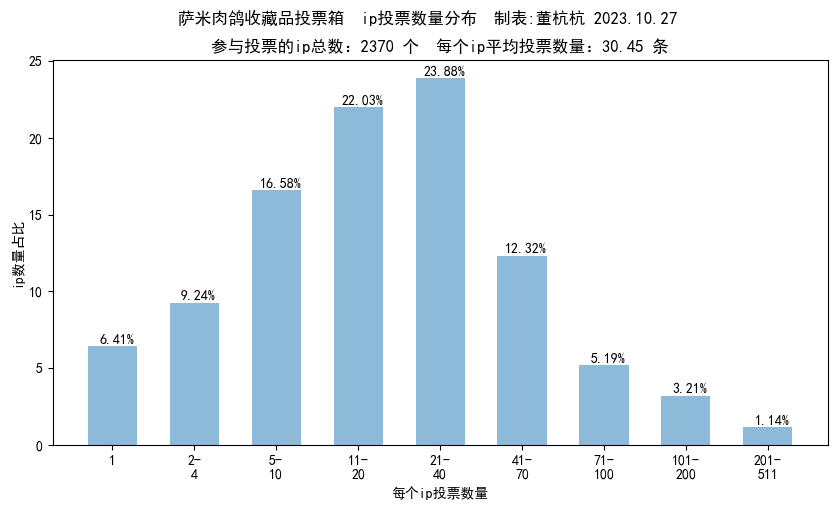

In [46]:
# 生成可视化图表

tier = [0, 1, 4, 10, 20, 40, 70, 100, 200, list_vote_num[0]]
tier_cnt = []

labels = [str(tier[_]+1) + '-\n' + str(tier[_+1]) for _ in  range(len(tier) - 1)]
labels[0] = '1'


for i in range(len(tier) - 1):
    tier_cnt.append(len([_ for _ in list_vote_num if tier[i] < _ and _ <= tier[i+1]]) / len(list_vote_num) * 100)

plt.figure(figsize=(10, 5))
plt.bar(range(len(tier_cnt)), tier_cnt, width=0.6, align='center', alpha=0.5, tick_label=labels)


plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False
plt.xlabel('每个ip投票数量')
plt.ylabel('ip数量占比')
plt.suptitle('萨米肉鸽收藏品投票箱  ip投票数量分布  制表:董杭杭 2023.10.27')
plt.title('参与投票的ip总数：2370 个  每个ip平均投票数量：30.45 条')

for x, y, z in zip(range(len(tier_cnt)), tier_cnt, ('%.2f'%_ + '%' for _ in tier_cnt)):
    plt.text(x+0.05, y+0.05, z, ha='center',va='bottom')